In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import x_sin, sin_cos, generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs'
TIMESTEPS = 40
RNN_LAYERS = [{'steps': TIMESTEPS}, {'steps': 30, 'keep_prob': 0.5}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 130000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                       print_steps=PRINT_STEPS,
                                                       early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

Step #100, epoch #1, avg. train loss: 0.18850, avg. val loss: 0.20952
Step #200, epoch #2, avg. train loss: 0.02471, avg. val loss: 0.02380
Step #300, epoch #3, avg. train loss: 0.01565, avg. val loss: 0.01376
Step #400, epoch #4, avg. train loss: 0.01197, avg. val loss: 0.01008
Step #500, epoch #6, avg. train loss: 0.01020, avg. val loss: 0.00847
Step #600, epoch #7, avg. train loss: 0.00890, avg. val loss: 0.00757
Step #700, epoch #8, avg. train loss: 0.00804, avg. val loss: 0.00687
Step #800, epoch #9, avg. train loss: 0.00753, avg. val loss: 0.00629
Step #900, epoch #11, avg. train loss: 0.00679, avg. val loss: 0.00584
Step #1000, epoch #12, avg. train loss: 0.00635, avg. val loss: 0.00537
Step #1100, epoch #13, avg. train loss: 0.00580, avg. val loss: 0.00497
Step #1200, epoch #14, avg. train loss: 0.00542, avg. val loss: 0.00466
Step #1300, epoch #16, avg. train loss: 0.00499, avg. val loss: 0.00438
Step #1400, epoch #17, avg. train loss: 0.00478, avg. val loss: 0.00411
Step #150

TensorFlowEstimator(batch_size=100, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.01,
          model_fn=<function _lstm_model at 0x112cce500>, n_classes=0,
          optimizer='Adagrad', steps=10000, verbose=1)

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.000776


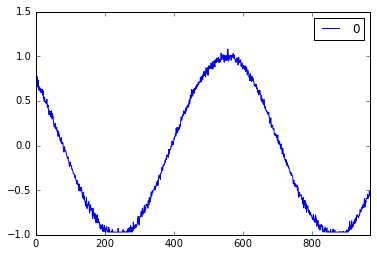

In [6]:
plt.plot(predicted)

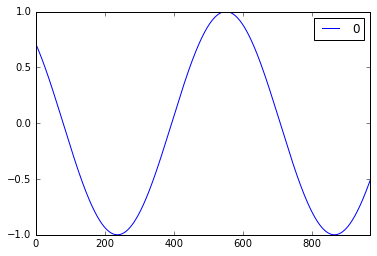

In [7]:
plt.plot(y['test'])

In [4]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      print_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

Step #100, epoch #1, avg. train loss: 0.43022, avg. val loss: 0.46656
Step #200, epoch #2, avg. train loss: 0.22001, avg. val loss: 0.22727
Step #300, epoch #3, avg. train loss: 0.10315, avg. val loss: 0.09830
Step #400, epoch #4, avg. train loss: 0.05693, avg. val loss: 0.04709
Step #500, epoch #6, avg. train loss: 0.04142, avg. val loss: 0.03352
Step #600, epoch #7, avg. train loss: 0.03199, avg. val loss: 0.02591
Step #700, epoch #8, avg. train loss: 0.02642, avg. val loss: 0.02103
Step #800, epoch #9, avg. train loss: 0.02210, avg. val loss: 0.01753
Step #900, epoch #11, avg. train loss: 0.01880, avg. val loss: 0.01503
Step #1000, epoch #12, avg. train loss: 0.01623, avg. val loss: 0.01306
Step #1100, epoch #13, avg. train loss: 0.01415, avg. val loss: 0.01159
Step #1200, epoch #14, avg. train loss: 0.01263, avg. val loss: 0.01031
Step #1300, epoch #16, avg. train loss: 0.01133, avg. val loss: 0.00933
Step #1400, epoch #17, avg. train loss: 0.01022, avg. val loss: 0.00848
Step #150

TensorFlowEstimator(batch_size=100, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.01,
          model_fn=<function _lstm_model at 0x111716500>, n_classes=0,
          optimizer='Adagrad', steps=10000, verbose=1)

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.001144


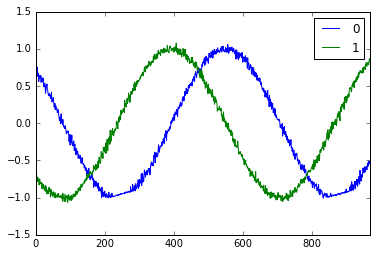

In [7]:
plt.plot(predicted)

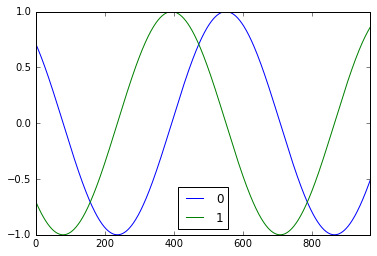

In [6]:
plt.plot(y['test'])

In [4]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [5]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      print_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

Step #1300, epoch #16, avg. train loss: 79.31195, avg. val loss: 571.35736
Step #2600, epoch #32, avg. train loss: 5.40203, avg. val loss: 119.96188
Step #3900, epoch #48, avg. train loss: 2.79891, avg. val loss: 70.77954
Step #5200, epoch #64, avg. train loss: 1.98690, avg. val loss: 51.42542
Step #6500, epoch #80, avg. train loss: 1.56829, avg. val loss: 40.86681
Step #7800, epoch #96, avg. train loss: 1.33609, avg. val loss: 34.80757
Step #9100, epoch #112, avg. train loss: 1.19650, avg. val loss: 30.77777
Step #10400, epoch #128, avg. train loss: 1.06976, avg. val loss: 27.88393
Step #11700, epoch #144, avg. train loss: 0.98968, avg. val loss: 25.61797
Step #13000, epoch #160, avg. train loss: 0.89746, avg. val loss: 23.92393
Step #14300, epoch #176, avg. train loss: 0.84729, avg. val loss: 22.55815
Step #15600, epoch #192, avg. train loss: 0.79294, avg. val loss: 21.40537
Step #16900, epoch #208, avg. train loss: 0.75303, avg. val loss: 20.38942
Step #18200, epoch #224, avg. train

Stopping. Best step:
 step 38244 with loss 15.0589122772


TensorFlowEstimator(batch_size=100, class_weight=None, clip_gradients=5.0,
          config=None, continue_training=False, learning_rate=0.03,
          model_fn=<function _lstm_model at 0x10f5fd5f0>, n_classes=0,
          optimizer='Adagrad', steps=130000, verbose=1)

In [20]:
predicted = regressor.predict(X['test'])
score = mean_squared_error(predicted, y['test'])
print "MSE: {}".format(score)

MSE: 61.024454351


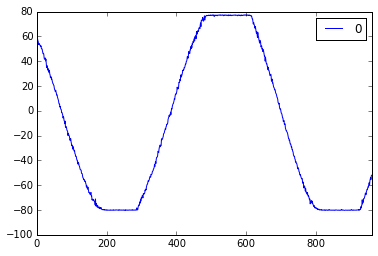

In [8]:
plt.plot(predicted)

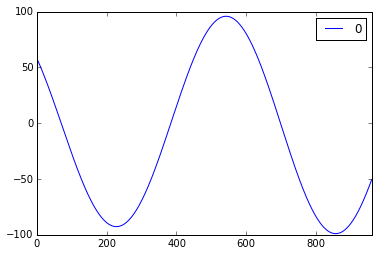

In [14]:
plt.plot(y['test'])

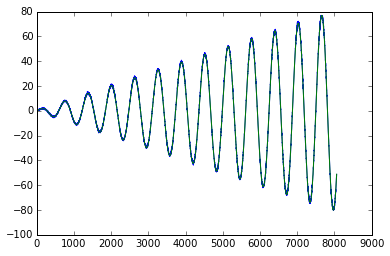

In [19]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])